##1. 使用画像の読み込みと表示
Kerasを使い、CIFAR-10の読み込み(約6万枚の画像にラベルをつけたたデータセット)

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step
Image size: (32, 32, 3)


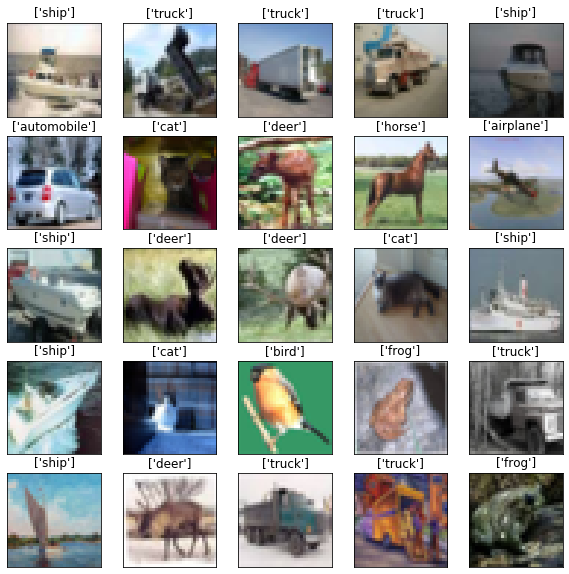

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print("Image size:", x_train[0].shape)

cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer",
                           "dog", "frog", "horse", "ship", "truck"])

n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)

plt.figure(figsize=(10,10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_idx[i]])
    label = cifar10_labels[t_train[rand_idx[i]]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示に

plt.show()

##2. クラスの設定とラベルのOne-hot表現
 

In [4]:
batch_size = 32
epochs = 20
n_class = 10  # 10のクラスに分類

# one-hot表現に変換
t_train = keras.utils.to_categorical(t_train, n_class)
t_test = keras.utils.to_categorical(t_test, n_class)
print(t_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


##3. モデルの構築
 
ex)
------------------------  
畳み込み層  
畳み込み層  
Maxプーリング層  
畳み込み層  
畳み込み層  
Maxプーリング層  
全結合層  
全結合層  

------------------------  

rele: 層の数が多く勾配消失を防ぐために採用

ドロップアウト: ランダムにニューロンを無効にするテクニック｡(モデルの汎化性能が向上)

ニューロン数: 256

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))  # ゼロパディング、バッチサイズ以外の画像の形状を指定
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # 一次元の配列に変換
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496    

##3. 学習

In [6]:
x_train = x_train / 255  # 0から1の範囲に収める
x_test = x_test / 255

history = model.fit(x_train, t_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, t_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/20





50000/50000 [==============================] - 30s 603us/step - loss: 1.5066 - acc: 0.4511 - val_loss: 1.1424 - val_acc: 0.6014
Epoch 2/20
50000/50000 [==============================] - 21s 417us/step - loss: 1.0687 - acc: 0.6263 - val_loss: 0.8988 - val_acc: 0.6916
Epoch 3/20
50000/50000 [==============================] - 21s 425us/step - loss: 0.8989 - acc: 0.6869 - val_loss: 0.8372 - val_acc: 0.7081
Epoch 4/20
50000/50000 [==============================] - 21s 418us/step - loss: 0.7838 - acc: 0.7266 - val_loss: 0.7760 - val_acc: 0.7317
Epoch 5/20
50000/50000 [==============================] - 21s 418us/step - loss: 0.7113 - acc: 0.7502 - val_loss: 0.7648 - val_acc: 0.7347
Epoch 6/20
50000/50000 [==============================] - 21s 417us/step - loss: 0.6435 - acc: 0.7768 - val_loss: 0.7397 - val_acc: 0.7450
Epoch 7/20
500

##4. 学習の推移


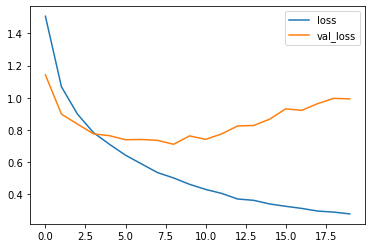

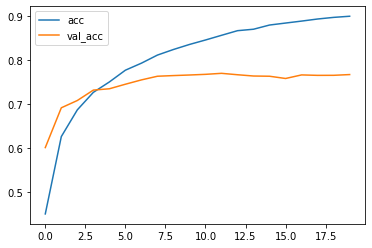

In [7]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']  # 訓練用データの誤差
train_acc = history.history['acc']  # 訓練用データの精度
val_loss = history.history['val_loss']  # 検証用データの誤差
val_acc = history.history['val_acc']  # 検証用データの精度

plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()

plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

##4. モデルの評価
  

In [8]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

10000/10000 [==============================] - 1s 149us/step
0.9929906593799591 0.7669


##5. 作成したモデルを使って検証

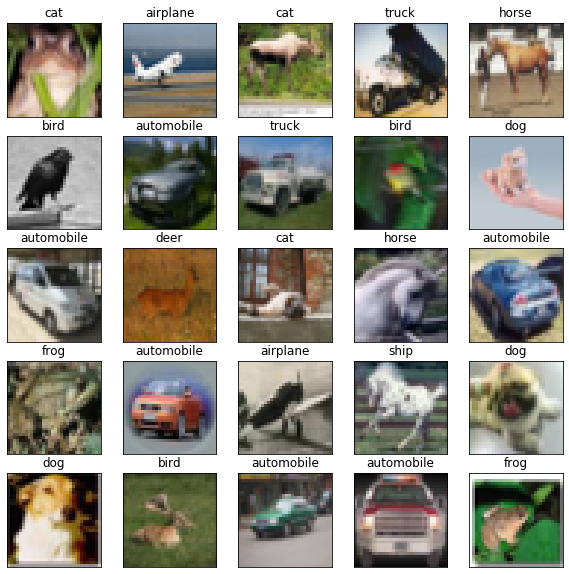

In [6]:
n_image = 25
rand_idx = np.random.randint(0, len(x_test), n_image)

y_rand = model.predict(x_test[rand_idx])
predicted_class = np.argmax(y_rand, axis=1)

plt.figure(figsize=(10, 10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5, 5, i+1)
    plt.imshow(x_test[rand_idx[i]])
    label = cifar10_labels[predicted_class[i]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()

##6. モデルの保存
学習済みのモデルをGoogle Driveに保存  

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
from keras.models import load_model

path = '/content/drive/My Drive/cnn_cifar10/'

# ディレクトリを作成　する
if not os.path.exists(path):
    os.makedirs(path)

# ファイルを保存する
model.save(path + "model_cnn_cifar10.h5")